In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import hsv_to_rgb

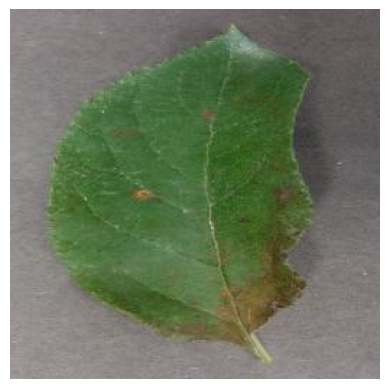

In [14]:
import cv2
import matplotlib.pyplot as plt

# Corrected file path
img = cv2.imread(r'C:\Users\anush\Downloads\Plant-Disease-Detection-master\Plant-Disease-Detection-master\image_classification\dataset\train\diseased\716.jpg')
if img is None:
    print("Error: Image not found or unable to load.")
else:
    # Convert BGR to RGB and display the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide the axis
    plt.show()


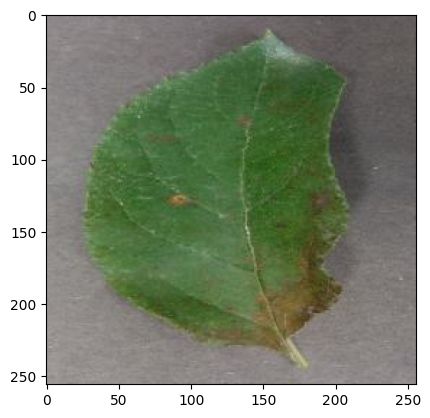

In [15]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

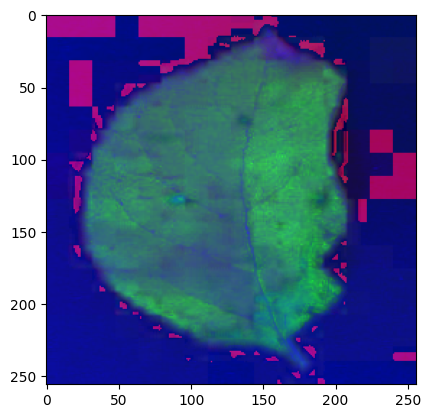

In [16]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img)

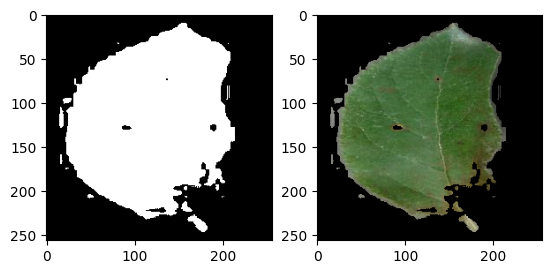

In [17]:
import numpy as np
lower_green = np.array([25,0,20])
upper_green = np.array([100,255,255])
mask = cv2.inRange(hsv_img, lower_green, upper_green)
result = cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

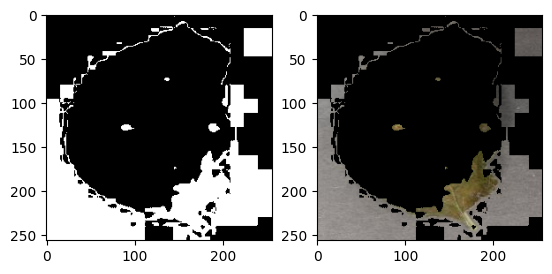

In [18]:
lower_brown = np.array([10,0,10])
upper_brown = np.array([30,255,255])
disease_mask = cv2.inRange(hsv_img, lower_brown, upper_brown)
disease_result = cv2.bitwise_and(img, img, mask=disease_mask)
plt.subplot(1, 2, 1)
plt.imshow(disease_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(disease_result)
plt.show()

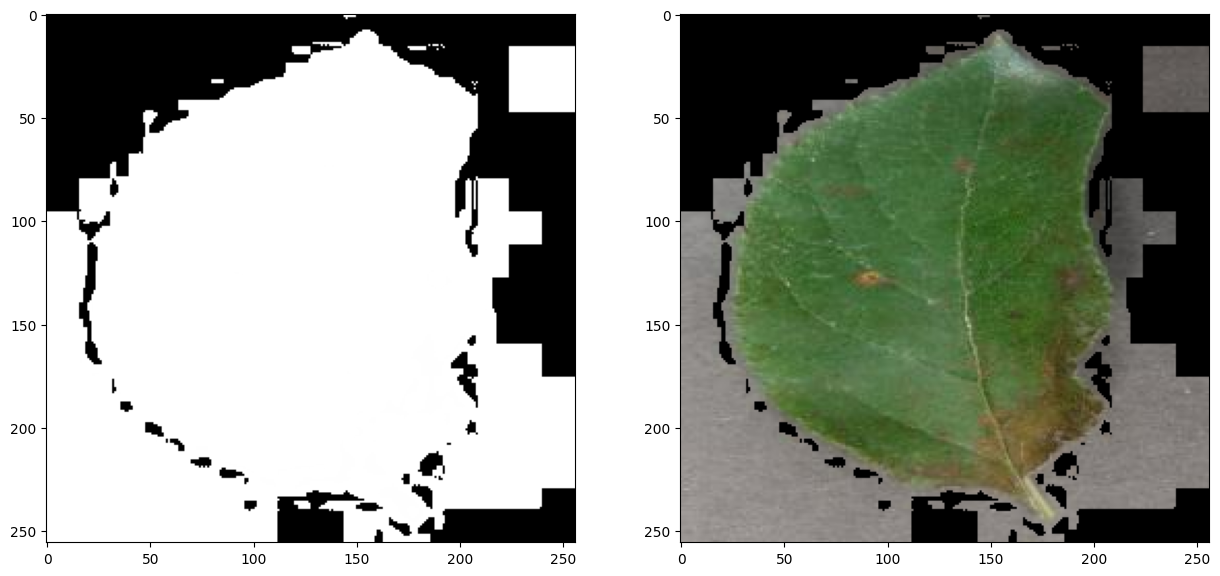

In [19]:
final_mask = mask + disease_mask
final_result = cv2.bitwise_and(img, img, mask=final_mask)
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

In [20]:
# Feature Descripotor

sift = cv2.SIFT_create()
# Find keypoints and descriptors directly
kp, des = sift.detectAndCompute(final_result,None)
len(kp)

221

In [21]:
print(kp)


(< cv2.KeyPoint 000001CE24EAFF60>, < cv2.KeyPoint 000001CE24EAFE10>, < cv2.KeyPoint 000001CE24ED3B40>, < cv2.KeyPoint 000001CE24ED3570>, < cv2.KeyPoint 000001CE24ED3660>, < cv2.KeyPoint 000001CE24ED3FC0>, < cv2.KeyPoint 000001CE24ED3780>, < cv2.KeyPoint 000001CE24ED3690>, < cv2.KeyPoint 000001CE24F3F930>, < cv2.KeyPoint 000001CE24F3F5D0>, < cv2.KeyPoint 000001CE24F3F4B0>, < cv2.KeyPoint 000001CE24F3FC90>, < cv2.KeyPoint 000001CE24F3FDB0>, < cv2.KeyPoint 000001CE24F3FD50>, < cv2.KeyPoint 000001CE24F3F600>, < cv2.KeyPoint 000001CE24F3F510>, < cv2.KeyPoint 000001CE24F3F420>, < cv2.KeyPoint 000001CE24F3F540>, < cv2.KeyPoint 000001CE24F3F3C0>, < cv2.KeyPoint 000001CE24F3F570>, < cv2.KeyPoint 000001CE24F3CE40>, < cv2.KeyPoint 000001CE24F3F3F0>, < cv2.KeyPoint 000001CE24F3FBA0>, < cv2.KeyPoint 000001CE24F3FBD0>, < cv2.KeyPoint 000001CE24F3FB40>, < cv2.KeyPoint 000001CE24F3F5A0>, < cv2.KeyPoint 000001CE24F3F480>, < cv2.KeyPoint 000001CE24F3CDB0>, < cv2.KeyPoint 000001CE24F3FCC0>, < cv2.KeyPoin

In [22]:
print(des)

[[ 51.  22.  79. ...   0.   0.   0.]
 [  0.   0.   0. ...  32.  11.  61.]
 [144.  67.   2. ...   0.   0.   0.]
 ...
 [ 18.   0.   0. ...   0.   0.  23.]
 [  0.   0.   0. ...   2.   0.   1.]
 [ 14.   0.   0. ...   0.   0.  23.]]


In [23]:
img2 = cv2.drawKeypoints(final_result,kp,None,(255,0,0),4)

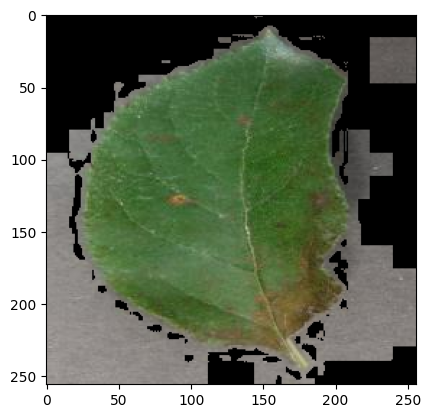

In [24]:
plt.imshow(final_result)

In [25]:
# global Feature
global_feature = des

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_feature)

In [27]:
global_feature.shape

(221, 128)

In [28]:
sift.descriptorSize()

128

In [ ]:
# Initialize or assign `global_feature`
global_feature = des  # Replace `des` with your actual feature data, e.g., from SIFT

# Debugging: Check the shape and content of `global_feature`
print("[STATUS] feature vector size {}".format(np.array(global_feature).shape))

# Save the feature vector to a CSV file
np.savetxt("doo.csv", global_feature, delimiter=",")
print("[STATUS] Feature vector saved to doo.csv")


[STATUS] feature vector size (221, 128)
[STATUS] Feature vector saved to doo.csv
